# UN population projection by gender

In [56]:
# Import libraries
import pandas as pd
import seaborn as sns

Dataset: [UN World Population Prospects 2022](https://population.un.org/wpp/Download/Standard/CSV/) in CSV format. Follow the link for the full explanation of what each category (column) means. Population numbers are written in thousands (i.e., 1000 = 1 mil).

In [57]:
# Load data from local file
file_url = r'data\WPP2022_TotalPopulationBySex.csv' # Path in Win11 format. You need to re-enter the path for Mac/Linux
df = pd.read_csv(file_url, low_memory=False)

In [58]:
df.head()

,SortOrder,LocID,Notes,ISO3_code,ISO2_code,SDMX_code,LocTypeID,LocTypeName,ParentID,Location,VarID,Variant,Time,MidPeriod,PopMale,PopFemale,PopTotal,PopDensity
0,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1950,1950.5,1245362.965,1253959.192,2499322.157,19.166
1,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1951,1951.5,1267473.182,1275657.198,2543130.380,19.502
2,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1952,1952.5,1291399.982,1298870.917,2590270.899,19.864
3,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1953,1953.5,1316659.222,1323619.574,2640278.797,20.247
4,1,900,NaN,NaN,NaN,1.0,1,World,0,World,2,Medium,1954,1954.5,1342923.171,1349056.168,2691979.339,20.643


In [59]:
df.shape

(359502, 18)

Filter the data

In [60]:
df['Variant'].unique()

array(['Medium', 'High', 'Low', 'Constant fertility',
       'Instant replacement', 'Zero migration', 'Constant mortality',
       'No change', 'Momentum', 'Instant replacement zero migration',
       'Median PI', 'Upper 80 PI', 'Lower 80 PI', 'Upper 95 PI',
       'Lower 95 PI'], dtype=object)

In [61]:
# Select country (Location)
df = df[df['Location'] == 'United Kingdom']

In [62]:
len(df)

1257

In [63]:
# Projection variant types
df['Variant'].unique()

array(['Medium', 'High', 'Low', 'Constant fertility',
       'Instant replacement', 'Zero migration', 'Constant mortality',
       'No change', 'Momentum', 'Instant replacement zero migration',
       'Median PI', 'Upper 80 PI', 'Lower 80 PI', 'Upper 95 PI',
       'Lower 95 PI'], dtype=object)

In [64]:
# Select projection variant (Variant)
df = df[df['Variant'] == 'Zero migration']

In [ ]:
df

Reshape for plotting

In [65]:
# Select only columns relevant for the graph:
df = df[['Time', 'PopMale', 'PopFemale']]

In [66]:
# Melt the male and female columns into one, in order to assign them to different lines
df = df.melt("Time", var_name="Gender", value_name="Number")

In [67]:
df

,Time,Gender,Number
0,2022,PopMale,33319.003
1,2023,PopMale,33360.255
2,2024,PopMale,33397.359
3,2025,PopMale,33429.320
4,2026,PopMale,33455.940
...,...,...,...
153,2096,PopFemale,26301.441
154,2097,PopFemale,26161.883
155,2098,PopFemale,26023.330
156,2099,PopFemale,25885.696


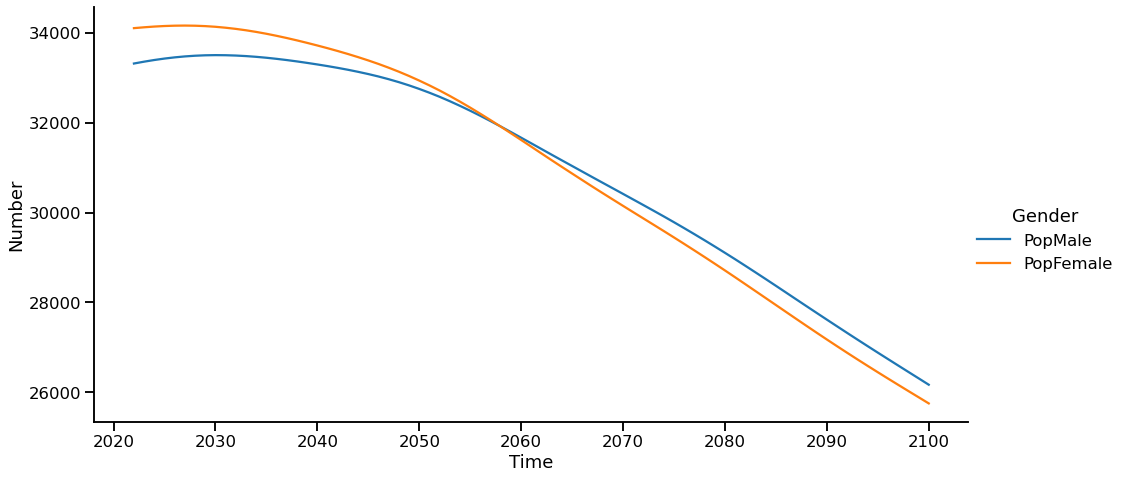

In [68]:
sns.set_context("talk") # Size preset for graph
# Plot change in number over time for two categories:
sns.relplot(data=df, x="Time", y="Number", hue="Gender", kind="line", height=7, aspect=2)